In [ ]:
# EXPERIMENT 1
#DESCRIPTION: 

In [1]:
import dimod
from dimod import ConstrainedQuadraticModel, Binary
from dimod import quicksum

# Depot, Customers 1 and 2, Vehicles a and b
nodes = [0, 1, 2]          # 0 = depot
customers = [1, 2]
vehicles = ['a', 'b']

# Distance matrix (costs)
t = {
    (0,1): 3, (1,0): 3,
    (0,2): 5, (2,0): 5,
    (1,2): 4, (2,1): 4
}


# Create binary decision variables                   
# ---------------------------------
x = {}
for i in nodes:
    for j in nodes:
        if i != j: 
            for k in vehicles:
                name = f"x_{i}_{j}_{k}"
                x[i,j,k] = Binary(name)


# Building the CQM
# -----------------
cqm = ConstrainedQuadraticModel()

# 1) Objective: minimize total travel time
objective = quicksum(t[i,j] * x[i,j,k]
                     for i,j,k in x.keys())
cqm.set_objective(objective)

# Constraints
# -----------

# Each customer visited exactly once
for v in customers:
    cqm.add_constraint(
        quicksum(x[i,v,k] for i in nodes if i != v for k in vehicles) == 1,
        label=f"visit_{v}"
    )

# Depot start & end (each vehicle)
for k in vehicles:
    # start from depot once
    cqm.add_constraint(
        quicksum(x[0,j,k] for j in customers) == 1,
        label=f"start_{k}"
    )
    # return to depot once
    cqm.add_constraint(
        quicksum(x[i,0,k] for i in customers) == 1,
        label=f"end_{k}"
    )

# Flow conservation (each vehicle & each customer)
for v in customers:
    for k in vehicles:
        cqm.add_constraint(
            quicksum(x[i,v,k] for i in nodes if i != v) -
            quicksum(x[v,j,k] for j in nodes if j != v) == 0,
            label=f"flow_{v}_{k}"
        )

print("✅ CQM created with", len(cqm.constraints), "constraints and", len(x), "variables.")

# Converting to BQM 
bqm, invert = dimod.cqm_to_bqm(cqm)


#EXPERIMENT
print("Number of variables:", len(bqm.variables))

✅ CQM created with 10 constraints and 12 variables.
Number of variables: 12


In [9]:
import matplotlib.pyplot as plt
annealing_times = [1, 5, 10, 20, 50]
energies = [12, 10, 9, 8.5, 8.3]

algorithms = ["Offset", "No Offset", "Annealing Opt"]
means = [9.8, 12.0, 9.2]

import numpy as np
matrix = np.random.rand(10, 10)

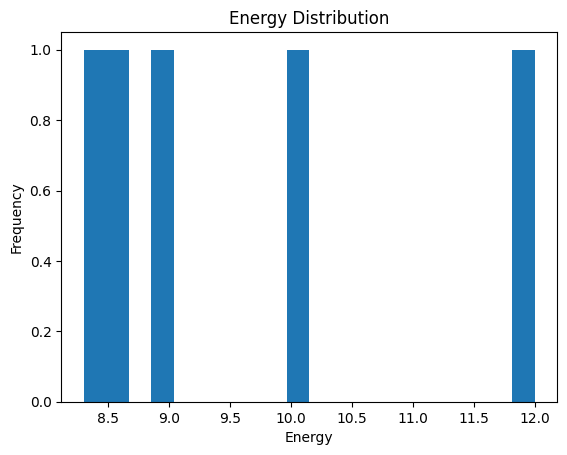

In [10]:
# HISTOGRAM
plt.hist(energies, bins=20)
plt.xlabel("Energy")
plt.ylabel("Frequency")
plt.title("Energy Distribution")
plt.show()